<a href="https://colab.research.google.com/github/minniewithane/MSc-Final-Project/blob/main/Image_test_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model loaded successfully.


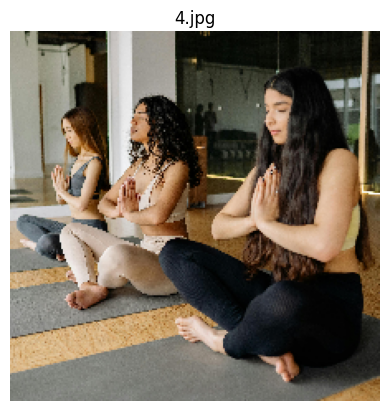

1/1 [==============================] - 2s 2s/step


ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 30)

In [ ]:
# !pip install --upgrade tensorflow==2.13
# !pip install keras==2.13.1

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Replace with the path to your model and image in Google Drive
# model_path = '/content/drive/My Drive/Birmingham/Final Project/classifier_v2_30classes.keras'
model_path = '/content/drive/My Drive/Birmingham/Final Project/classifier_v2_30classes.h5'
images_folder_path = '/content/drive/My Drive/Birmingham/Final Project/test image'

# Load the model
# Add a try-except block to catch potential errors
try:
    model = load_model(model_path)
    print("Model loaded successfully.")
except ValueError as e:
    print(f"Error loading model: {e}")
    # If the error persists, consider these additional steps:
    # 1. Re-save the model in your original training environment using the same TensorFlow/Keras versions.
    # 2. Verify the integrity of the model file (check file size, try downloading it again).


class_names = ["children", "couple", "family", "female celebrity", "male celebrity",
               "male friend", "female friend", "mix friend", "selfie", "journal",
               "chef", "doctor", "engineer", "farmer", "firefighter",
               "judge", "mechanic", "pilot", "police", "waiter",
               "beach", "drawing", "mountain", "sculpture",
               "meditation", "yoga_downdog", "yoga_goddess", "yoga_plank", "yoga_tree", "yoga_warrior"]

# Load and preprocess the image
image_files = [f for f in os.listdir(images_folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

for img_file in image_files:
    # Load and preprocess the image
    img_path = os.path.join(images_folder_path, img_file)
    img = image.load_img(img_path, target_size=(224, 224))  # Adjust target size for your model
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.resnet50.preprocess_input(img_array)  # Adjust preprocessing to your model

    # Display the image
    plt.imshow(img)
    plt.title(img_file)
    plt.axis('off')
    plt.show()

    # Make predictions
    predictions = model.predict(img_array)

    # Assuming the model is trained on ImageNet
    decoded_predictions = tf.keras.applications.resnet50.decode_predictions(predictions, top=3)

    # Display the top 3 predictions
    print(f"Predictions for {img_file}:")
    for i, (imagenet_id, label, score) in enumerate(decoded_predictions[0]):
        print(f"Rank {i+1}: Class: {label}, Probability: {score:.4f}")
    print("\n" + "-"*30 + "\n")


Model loaded successfully.
The model does not contain explicit class labels. Manual alignment is required.


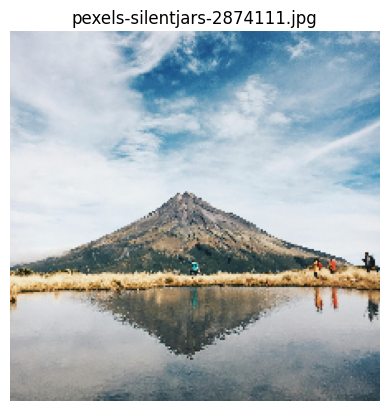

1/1 [==============================] - 1s 1s/step
Prediction for pexels-silentjars-2874111.jpg:
Class: 3_mountain, Probability: 0.8600

------------------------------



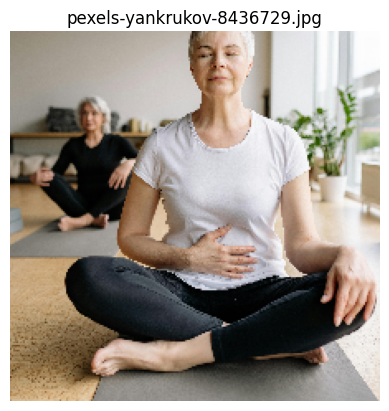

1/1 [==============================] - 0s 203ms/step
Prediction for pexels-yankrukov-8436729.jpg:
Class: 4_meditation, Probability: 0.9997

------------------------------



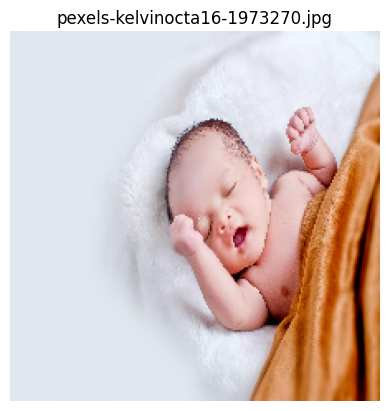

1/1 [==============================] - 0s 201ms/step
Prediction for pexels-kelvinocta16-1973270.jpg:
Class: 1_children, Probability: 1.0000

------------------------------



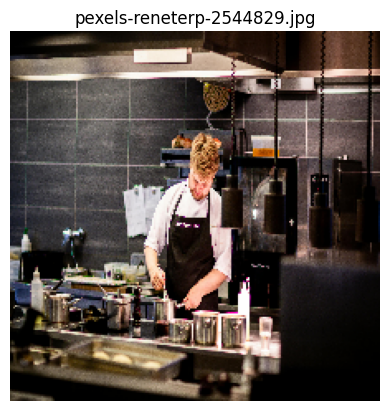

1/1 [==============================] - 0s 223ms/step
Prediction for pexels-reneterp-2544829.jpg:
Class: 2_chef, Probability: 0.9685

------------------------------



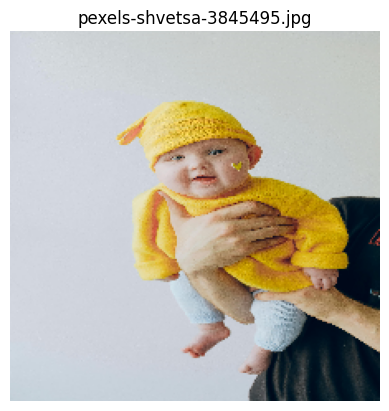

1/1 [==============================] - 0s 191ms/step
Prediction for pexels-shvetsa-3845495.jpg:
Class: 1_children, Probability: 0.8638

------------------------------



In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# !pip install --upgrade tensorflow==2.13
# !pip install keras==2.13.1

# import tensorflow as tf
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing import image
# import numpy as np
# import matplotlib.pyplot as plt
# import os

# Replace with the path to your model and image in Google Drive
# model_path = '/content/drive/My Drive/Birmingham/Final Project/classifier_v2_30classes.keras'
model_path = '/content/drive/My Drive/Birmingham/Final Project/classifier_v2_30classes.h5'
images_folder_path = '/content/drive/My Drive/Birmingham/Final Project/test image/final'

# Load the model
# Add a try-except block to catch potential errors
try:
    model = load_model(model_path)
    print("Model loaded successfully.")
except ValueError as e:
    print(f"Error loading model: {e}")
    # If the error persists, consider these additional steps:
    # 1. Re-save the model in your original training environment using the same TensorFlow/Keras versions.
    # 2. Verify the integrity of the model file (check file size, try downloading it again).

# Assuming the model is a Keras model
if hasattr(model, 'classes_'):
    # This is common for models built using certain libraries
    model_classes = model.classes_
else:
    # Custom classes should be added during model building or training
    # If your model doesn't have these attributes, you'll need to manually align them.
    print("The model does not contain explicit class labels. Manual alignment is required.")


class_names = ['1_children', '1_couple', '1_family', '1_female_celebrity', '1_female_friend', '1_male_celebrity',
               '1_male_friends', '1_mix_friends', '1_selfie', '2_chef', '2_doctor', '2_engineer', '2_farmer',
               '2_firefighter', '2_judge', '2_mechanic', '2_pilot', '2_police', '2_waiter',
               '3_beach', '3_drawings', '3_mountain', '3_sculpture',
               '4_journal', '4_meditation', '4_yoga_downdog', '4_yoga_goddess', '4_yoga_plank', '4_yoga_tree', '4_yoga_warrior2']

# Load and preprocess the image
image_files = [f for f in os.listdir(images_folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

for img_file in image_files:
    # Load and preprocess the image
    img_path = os.path.join(images_folder_path, img_file)
    img = image.load_img(img_path, target_size=(224, 224))  # Adjust target size for your model
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.resnet50.preprocess_input(img_array)  # Adjust preprocessing to your model

    # Display the image
    plt.imshow(img)
    plt.title(img_file)
    plt.axis('off')
    plt.show()

    # Make predictions
    predictions = model.predict(img_array)

    # Decode predictions for your custom 30-class model
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_names[predicted_class_index]
    confidence_score = predictions[0][predicted_class_index]

    # Display the prediction
    print(f"Prediction for {img_file}:")
    print(f"Class: {predicted_class_name}, Probability: {confidence_score:.4f}")
    print("\n" + "-"*30 + "\n")

In [ ]:
import os

data_dir = '/content/drive/My Drive/Birmingham/Final Project/split_data/train'
class_names = sorted(os.listdir(data_dir))
print(class_names)


['1_children', '1_couple', '1_family', '1_female_celebrity', '1_female_friend', '1_male_celebrity', '1_male_friends', '1_mix_friends', '1_selfie', '2_chef', '2_doctor', '2_engineer', '2_farmer', '2_firefighter', '2_judge', '2_mechanic', '2_pilot', '2_police', '2_waiter', '3_beach', '3_drawings', '3_mountain', '3_sculpture', '4_journal', '4_meditation', '4_yoga_downdog', '4_yoga_goddess', '4_yoga_plank', '4_yoga_tree', '4_yoga_warrior2']
